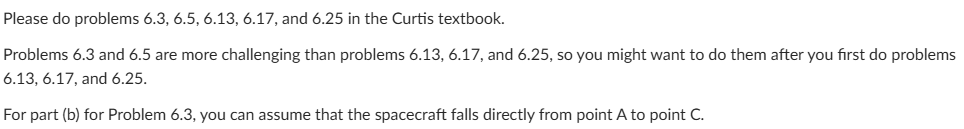
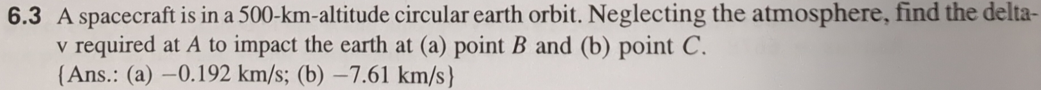
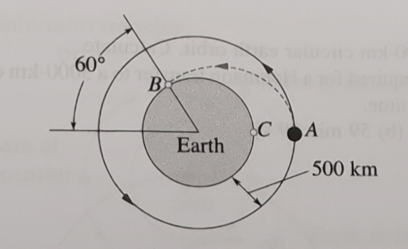

I consider Δv a positive scalar, since you are always burning propellant. I don't think it makes sense to say it requires "negative Δv", but rather it requires a change in velocity of this magnitude, but pointed opposite the current velocity vector to accomplish these maneuvers

In [1]:
import sympy 
from sympy import *
import sys

# symbols

r_1 = Symbol('r_1')
r_B = Symbol ('r_B')
theta_B = Symbol ('theta_B')
r_p_2 = Symbol ('r_p_2')
r_a_2 = Symbol ('r_a_2')
mu = Symbol ('mu')
r_E = Symbol ('r_E')

# values

values = [
    (r_B, r_E),
    (theta_B, 120/180 * pi),
    (r_1, 500 + r_E),
    (mu, 3.986 * 10**5),
    (r_E, 6378),
]

# initial orbit
v_1 = sqrt(mu/r_1)

# point B is when the spacecraft has a radius of 6378km at true anomaly of 120 degrees, apogee 6878km
# we can rearrange eq 2.45 to solve for e with our r & thetas at apoapsis and at point B
e_B = (1 - r_1/r_B)/(r_1/r_B - cos(theta_B))

# now we can solve for a by using eqs. 2.45 and 2.71
a_B = r_B*(1 + e_B*cos(theta_B))/(1 - e_B**2)

# now we can solve for velocity at apoapsis using eq. 2.81
v_a_B = sqrt(mu*(2/r_1 - 1/a_B))

# now the delta V is just the difference between our current velocity and our target velocity
Δv_B = v_1 - v_a_B
print( 'Δv to impact point B', Δv_B.subs(values).evalf(), ' km/s')

# point C is only possible if the full current velocity is cancelled 
print( 'Δv to impact point C', v_1.subs(values).evalf(), ' km/s')

Δv to impact point B 0.191457928135613  km/s
Δv to impact point C 7.61267977015526  km/s


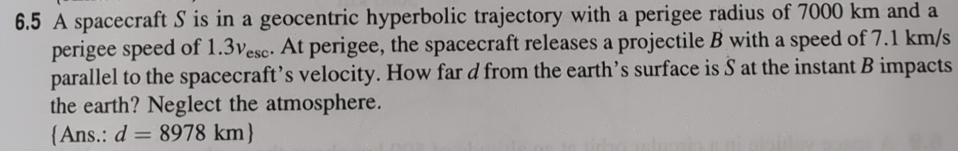

In [2]:
%reset -f
import sympy 
from sympy import *
import sys

# symbols

v_ap_B = Symbol('v_ap_B')
r_ap_B = Symbol ('r_ap_B')
r_pe_S = Symbol ('r_pe_S')
v_pe_S = Symbol ('v_pe_S')
v_esc = Symbol ('v_esc')
mu = Symbol ('mu')
r_E = Symbol ('r_E')

# values

values = [
    (v_pe_S, 1.3*v_esc),
    (v_esc, sqrt((2*mu)/r_pe_S)),
    (r_pe_S, 7000),
    (r_ap_B, 7000),
    (v_ap_B, 7.1),
    (mu, 3.986 * 10**5),
    (r_E, 6378),
]



# so first we want to find the time it takes the projectile to impact the earth
# so firstly first we need to find the true anomaly at which the projectile will impact the earth
h_B = r_ap_B*v_ap_B

# now we rearrange eq 2.45 to solve for e
e_B = ((h_B**2) / (r_ap_B * mu)) - 1

# now we use eq 2.45 again to find the true anomaly at r_E
theta_B_impact = acos((h_B**2 / (r_E * mu) - 1) / e_B)

# now we need to calculate the time to impact
# we need a, we can use eq 2.71
a_B = h_B**2 / (mu * (1 - e_B**2))

# we can calculate orbital period from eq. 2.83
Period_B = (2*pi*a_B**(1.5))/(mu**(0.5))

# We need to find the eccentricity anomaly E
E_1 = acos((e_B + cos(theta_B_impact))/(1 + e_B*cos(theta_B_impact)))

# Now we can calculate Mean anomaly with eq. 3.14
ME_1 = E_1 - e_B*sin(E_1)

# Now we can find t_B_impact
t_B_impact = (ME_1*Period_B)/(2*pi)
print("Time to impact is:",t_B_impact.subs(values).evalf(),"seconds")

# now we want to find the true anomoly of our spacecraft at this time

# we want to calculate angular momentum h
h_S = r_pe_S*v_pe_S

# reorganize eq.111 to calculate a:
a_S = (mu*r_pe_S)/(r_pe_S*v_pe_S**2-2*mu)

# rearrange eq. 2.103 to calculate e:
e_S = sqrt(1 + (h_S**2)/(a_S*mu))

# functions modified for hyperbolic sine and cosine as according to eq 3.45
def function(F,ME):
    return e_S*sinh(F) - F - ME

def dfunction(F):
    return e_S*cosh(F) - 1

def Newton_Solver( F0,ME, tol = 10e-12, max_iter = 100):
    x = F0
    for i in range(max_iter):
        fx = function(x,ME)
        fx = fx.subs(values).evalf()
        dfx = dfunction(x)
        dfx = dfx.subs(values).evalf()
        if abs(fx) < tol:
            print( 'convergence reached, x =',x)
            return x
        if dfx == 0:
            print('singularity hit: exiting')
            sys.exit(0)
        x = x - fx/dfx
        if i % 10 == 0:
            print('newton iteration:',i,'value is currently:',x)


# we can use eq. 3.31 to calculate the mean anomaly at 36 hours after perigee
ME_i = (((e_S**2 - 1)**(3/2))*t_B_impact*mu**2)/(h_S**3)
F_i = Newton_Solver((-pi/2).evalf(),ME_i)

# use equation 3.41b to find our true anomaly of interest
theta_i = acos((cosh(F_i) - e_S)/(1 - e_S*cosh(F_i)))

# # now we use eq. 2.45 to calculate our radius of interest
r_i = (h_S**2)/(mu*(1 + e_S*cos(theta_i)))

# then we subtract the earths radius
h_i = r_i - r_E

print("Altitude of spacecraft at projectile impact:",h_i.subs(values).evalf(),"km")


Time to impact is: 1219.62158349296 seconds
newton iteration: 0 value is currently: -0.356418750744075
convergence reached, x = 1.11752532062144
Altitude of spacecraft at projectile impact: 8978.36192145348 km


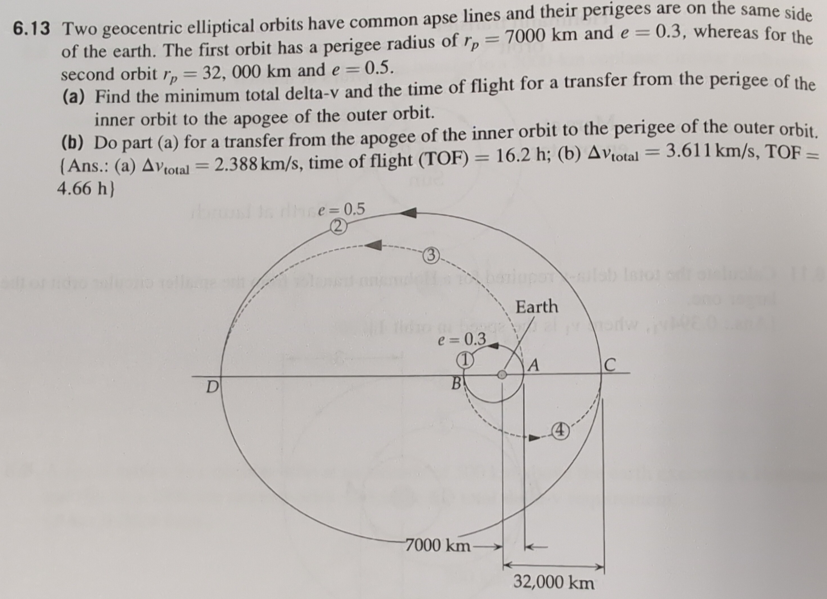

In [3]:
%reset -f
import sympy 
from sympy import *
import sys

# symbols

r_pe_1 = Symbol('r_pe_1')
r_pe_2 = Symbol('r_pe_2')
e_1 = Symbol('e_1')
e_2 = Symbol('e_2')
mu = Symbol ('mu')
r_E = Symbol ('r_E')

# values

values = [
    (r_pe_1, 7000),
    (r_pe_2, 32000),
    (e_1, 0.3),
    (e_2, 0.5),
    (mu, 3.986 * 10**5),
    (r_E, 6378),
]
# let us first calculate our missing values for apogees and velocities
# rearranging eq 2.84 we can solve for apoapses
r_ap_1 = -r_pe_1*((e_1 + 1)/(e_1 - 1))
r_ap_2 = -r_pe_2*((e_2 + 1)/(e_2 - 1))

# let us find a's by using eq 2.71
a_1 = (r_ap_1 + r_pe_1)/2
a_2 = (r_ap_2 + r_pe_2)/2

# let us find the velocities at both periapsis and apoapsis, rearranging eq 2.81
v_pe_1 = sqrt(mu*(2/r_pe_1 - 1/a_1))
v_ap_1 = sqrt(mu*(2/r_ap_1 - 1/a_1))

v_pe_2 = sqrt(mu*(2/r_pe_2 - 1/a_2))
v_ap_2 = sqrt(mu*(2/r_ap_2 - 1/a_2))

# Part A:
# now let us work on the first transfer, from perigee 1 to apogee 2
# I will call this transfer1

a_t1 = (r_pe_1 + r_ap_2)/2

# the injection burn
v_t1_i = sqrt(mu*(2/r_pe_1 - 1/a_t1))

Δv_t1_i = v_t1_i - v_pe_1

# the finalization burn
v_t1_f = sqrt(mu*(2/r_ap_2 - 1/a_t1))
Δv_t1_f = v_ap_2 - v_t1_f

# total delta V required:
Δv_t1_total = Δv_t1_f + Δv_t1_i

# time required, which is one half of the orbital period of the transfer orbit:
ΔT_t1 = (pi*a_t1**(1.5))/(mu**(0.5))

print("Part A:")
print("transfer 1 injection burn:",Δv_t1_i.subs(values).evalf(),"km/s")
print("transfer 1 rendezvous burn:",Δv_t1_f.subs(values).evalf(),"km/s\n")
print("Total Δv required for transfer 1:",Δv_t1_total.subs(values).evalf(),"km/s")
print("transfer 1 elapsed time:",(ΔT_t1/3600).subs(values).evalf(),"hours")

# Part B:
# now let us work on the second transfer, from apogee 1 to perigee 2
# I will call this transfer2

a_t2 = (r_ap_1 + r_pe_2)/2

# the injection burn
v_t2_i = sqrt(mu*(2/r_ap_1 - 1/a_t2))

Δv_t2_i = v_t2_i - v_ap_1

# the finalization burn
v_t2_f = sqrt(mu*(2/r_pe_2 - 1/a_t2))
Δv_t2_f = v_pe_2 - v_t2_f

# total delta V required:
Δv_t2_total = Δv_t2_f + Δv_t2_i

# time required, which is one half of the orbital period of the transfer orbit:
ΔT_t2 = (pi*a_t2**(1.5))/(mu**(0.5))
print("\n\nPart B:")
print("transfer 2 injection burn:",Δv_t2_i.subs(values).evalf(),"km/s")
print("transfer 2 rendezvous burn:",Δv_t2_f.subs(values).evalf(),"km/s\n")
print("Total Δv required for transfer 2:",Δv_t2_total.subs(values).evalf(),"km/s")
print("transfer 2 elapsed time:",(ΔT_t2/3600).subs(values).evalf(),"hours")


Part A:
transfer 1 injection burn: 1.69889389574355 km/s
transfer 1 rendezvous burn: 0.689608014852520 km/s

Total Δv required for transfer 1: 2.38850191059607 km/s
transfer 1 elapsed time: 16.1543529846265 hours


Part B:
transfer 2 injection burn: 1.97077310317930 km/s
transfer 2 rendezvous burn: 1.63983051108487 km/s

Total Δv required for transfer 2: 3.61060361426417 km/s
transfer 2 elapsed time: 4.66500917146546 hours


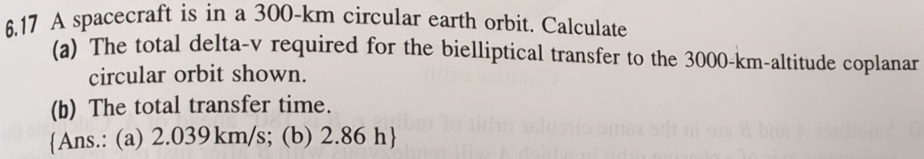
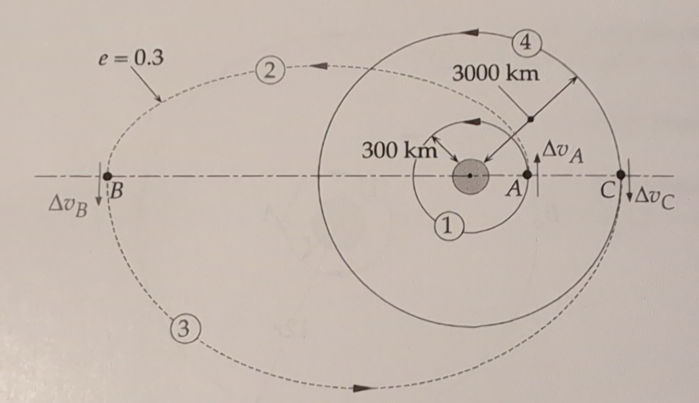

In [4]:
%reset -f
import sympy 
from sympy import *
import sys

# symbols

r_1 = Symbol('r_1')
r_2 = Symbol('r_2')
e_t1 = Symbol('e_t1')
mu = Symbol ('mu')
r_E = Symbol ('r_E')

# values

values = [
    (r_1, 300 + r_E),
    (r_2, 3000 + r_E),
    (e_t1, 0.3),
    (mu, 3.986 * 10**5),
    (r_E, 6378),
]

# the initial and target orbits are both circular, 
# but we need to calculate the elements of the transfers

r_ap_t = -r_1*((e_t1 + 1)/(e_t1 - 1))

a_t1 = (r_ap_t + r_1)/2
a_t2 = (r_ap_t + r_2)/2

# velocities of the two orbits as well
v_1 = sqrt(mu/r_1)
v_2 = sqrt(mu/r_2)

# I will call the three burns initial, middle, and final
# the initial burn
v_ti = sqrt(mu*(2/r_1 - 1/a_t1))
Δv_ti = v_ti - v_1

# the middle burn
v_ap_t1 = sqrt(mu*(2/r_ap_t - 1/a_t1))
v_ap_t2 = sqrt(mu*(2/r_ap_t - 1/a_t2))
Δv_tm = v_ap_t2 - v_ap_t1

# the final burn
v_tf = sqrt(mu*(2/r_2 - 1/a_t2))
Δv_tf = v_tf - v_2

# total delta V required:
Δv_total = Δv_ti + Δv_tm + Δv_tf

# time elapsed for leg 1 & leg 2:
ΔT_t1 = (pi*a_t1**(1.5))/(mu**(0.5))
ΔT_t2 = (pi*a_t2**(1.5))/(mu**(0.5))

ΔT_total = ΔT_t1 + ΔT_t2


print("Total Δv required for bielliptic transfer:",Δv_total.subs(values).evalf(),"km/s")
print("elapsed time:",(ΔT_total/3600).subs(values).evalf(),"hours")

Total Δv required for bielliptic transfer: 2.03860268073325 km/s
elapsed time: 2.85875551211230 hours


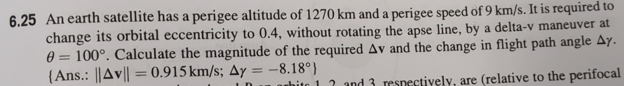

In [5]:
%reset -f
import sympy 
from sympy import *
import sys

# symbols

r_pe = Symbol('r_pe')
v_pe = Symbol('v_pe')
theta = Symbol('theta')
e_t = Symbol('e_t1')
mu = Symbol ('mu')
r_E = Symbol ('r_E')

# values

values = [
    (r_pe, 1270 + r_E),
    (v_pe, 9),
    (theta, 100 * pi / 180),
    (e_t, 0.4),
    (mu, 3.986 * 10**5),
    (r_E, 6378),
]
# first we need to find the current orbital eccentricity
h = v_pe * r_pe
e = ((h**2) / (r_pe * mu)) - 1

# now we need to find the radius at the true anomaly using eq 2.45

r = ((h**2) / (mu)) / (1 + e*cos(theta))

# I'm going to assume the true anomaly is the same, because the apse line and radius isn't changing
# now we need to calculate the target angular momentum

h_t = sqrt(r * mu * (1 + e_t*cos(theta)))

# now we need to calculate the v perp and v rad for both orbits

v_perp = h/r
v_perp_t = h_t/r

v_rad = (mu/h)*e*sin(theta)
v_rad_t = (mu/h_t)*e_t*sin(theta)

# now we can calculate the current, and the target flight path angle

γ = atan(v_rad/v_perp)
γ_t = atan(v_rad_t/v_perp_t)

Δγ = γ_t - γ

# as well as the change in velocity required

Δv_rad = v_rad_t - v_rad
Δv_perp = v_perp_t - v_perp

Δv = sqrt(Δv_perp**2 + Δv_rad**2)

print("Δv required for maneuver:",Δv.subs(values).evalf(),"km/s")
print("Δγ flight path angle change:",(Δγ * 180 / pi).subs(values).evalf(),"degrees")

Δv required for maneuver: 0.915452678988704 km/s
Δγ flight path angle change: -8.18134696499995 degrees
